# Stochastic Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Prepare MNIST DATA

In [2]:
data = pd.read_csv("data.csv")
data = np.array(data)

X = data[:, 1:].T
Y = data[:, 0]

digit_1 = 2
digit_2 = 6

digits = (digit_1, digit_2)

def specify_sample(X, Y, digit):
    idx = Y == digit
    return X[:, idx], Y[idx]

newsplitdata = [specify_sample(X, Y, dig) for dig in digits]

newX = np.concatenate([newsplitdata[i][0] for i in range(len(digits))], axis=1)
newY = np.concatenate([newsplitdata[i][1] for i in range(len(digits))])

def split_data(X, Y, Ntrain = Y.shape[0]//2):
    d, N = X.shape
    idx = np.arange(N)
    np.random.shuffle(idx)
    #print(idx)
    X_train = X[:, idx[:Ntrain]]
    X_test = X[:, idx[Ntrain:]]
    Y_train = Y[idx[:Ntrain]]
    Y_test = Y[idx[Ntrain:]]
    return (X_train, Y_train), (X_test, Y_test)

(Xtrain, Ytrain), (Xtest, Ytest) = split_data(newX, newY, 4500) 

X_backup = X
Y_backup = Y

X = Xtrain
Y = Ytrain


for i, y in enumerate(Y):
    if y == digit_1:
        Y[i] = 0
    elif y == digit_2:
        Y[i] = 1
    else:
        1/0


#### Prepare Utility Functions

In [3]:
def sigmoid(z):
    return 1/(1 + np.exp(-z) ) 

d, N = X.shape
print(X.shape, Xtest.shape)

def f(w, xhat):
    # print(sigmoid(xhat.T @ w))
    return sigmoid(xhat.T @ w)

# Value of the loss
def ell(w, Xhat, Y):
    d, N = Xhat.shape
    sum = 0
    for i in range(N):
        sum += abs(f(w, Xhat[:, i]) - Y[i])**2
    return sum / N
    

# Value of the gradient
def grad_ell(w, Xhat, Y):
    d, N = Xhat.shape
    sum = 0
    for i in range(N):
        ff = f(w, Xhat[:, i])
        ############################################### il problema qua è che il gradiente fa sempre 0. perché i valori della sigmoide sono o 0 o 1 e quindi ff (1 - ff) = 0 per forza.
        sum += ff * (1 - ff) * Xhat[:, i] * (ff - Y[i])
    return sum / N

def predict(w, X, threshold=0.5, hat = True):
    d, N = X.shape
    Xhat = X
    if not hat:
        Xhat = np.concatenate((np.ones((1,N)), Xhat), axis=0)
        
    Y = np.zeros((N,), dtype= int)
    for i in range(N):
        if f(w, Xhat[:, i]) >= threshold:
            Y[i] = digit_2
        else:
            Y[i] = digit_1
    return Y

def accuracy(Y_1, Y_2):
    array = Y_1 == Y_2
    return len(array[array == True])/len(array)



(784, 4500) (784, 3814)


#### SGD implementation

0.9792868379653906


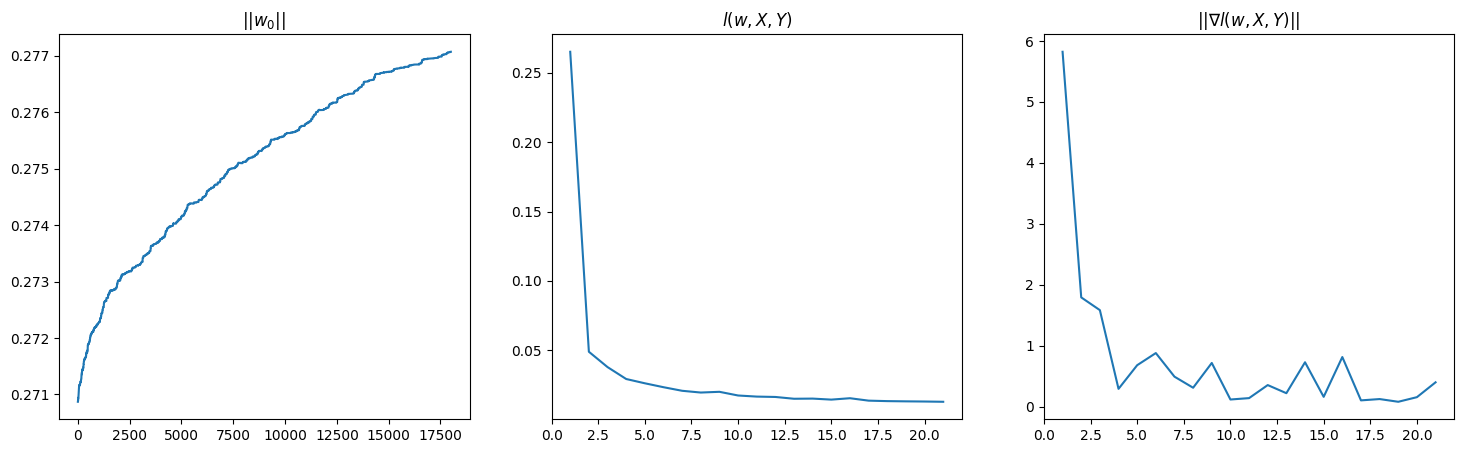

[[ 0.00609384 -0.00263039 -0.00062358 ... -0.00398127 -0.00400018
   0.01869411]
 [ 0.00609301 -0.00263039 -0.00062358 ... -0.00398127 -0.00400018
   0.01869411]
 [ 0.00609301 -0.00263039 -0.00062358 ... -0.00398127 -0.00400018
   0.01869411]
 ...
 [ 0.00607317 -0.00263039 -0.00062358 ... -0.00398127 -0.00400018
   0.01869411]
 [ 0.00607317 -0.00263039 -0.00062358 ... -0.00398127 -0.00400018
   0.01869411]
 [ 0.00607317 -0.00263039 -0.00062358 ... -0.00398127 -0.00400018
   0.01869411]]
[[ True  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 ...
 [False  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]]


In [5]:
data = (X, Y)
S = 5
E = 20

def SGD(l, grad_l, w0, data, batch_size = 5, n_epochs = 10):
    alpha = 5e-5
    
    X, Y = data
    d, N = X.shape
    
    X = np.concatenate((np.ones((1,N)), X), axis=0)
# print((Xhat.shape))
    
    n_batch_per_epoch = N // batch_size
    
    w = np.zeros((n_batch_per_epoch * n_epochs + 1, d + 1))
    f_val = np.zeros((n_epochs + 1,))
    grads = np.zeros((n_epochs + 1, d + 1))
    err = np.zeros((n_epochs + 1,))
    
    w[0, :] = w0
    f_val[0] = l(w0, X, Y)
    grads[0, :] = grad_l(w0, X, Y)
    err[0] = np.linalg.norm(grads[0], 2)
    
    indexes = np.arange(N)
    
    for epoch in range(n_epochs):
        np.random.shuffle(indexes)
        
        for k in range(1, n_batch_per_epoch + 1):
            if k * batch_size > N:
                idx = indexes[(k - 1)*batch_size : ]
            else:
                idx = indexes[(k - 1)*batch_size : (k) * batch_size]
            # print(idx)
            X_k = X[:, idx]
            Y_k = Y[idx]
            # print(alpha * grad_l(w0, X_k, Y_k))
            w_ = w0 - alpha * grad_l(w0, X_k, Y_k)
            # epoch * n_batch_per_epoch == iterazioni già 
            w[epoch * n_batch_per_epoch + k, :] = w_
            w0 = w_
        
        f_val[epoch + 1] = l(w0, X, Y)
        grads[epoch + 1, :] = grad_l(w0, X, Y)
        err[epoch + 1] = np.linalg.norm(grads[epoch + 1, :], 2)
    
    return w, f_val, grads, err


w0 = np.random.normal(0, 1e-2, (d + 1,))

w, f_val, grads, err = SGD(ell, grad_ell, w0 , data, S, E )
    
    
wstar = w[-1]
# print(wstar)
Y_fit = predict(wstar, Xtest, hat = False)

acc = accuracy(Y_fit, Ytest)

print(acc)
# print(tuple(Y_fit))

# plt.hist(w0)
normw0 = np.linalg.norm(w, 2, axis= 1)
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.title("$||w_0||$")
plt.plot(np.arange(1, N // S * E + 2), normw0)
plt.subplot(1, 3, 2)
plt.title("$l(w, X, Y)$")
plt.plot(np.arange(1, E + 2), f_val)
plt.subplot(1, 3, 3)
plt.title("$||\N{NABLA}l(w, X, Y)$||")
plt.plot(np.arange(1, E + 2), err)
plt.show()

print(w)
print(w0 == w)